In [1]:
import numpy as np # handling data structure
import pandas as pd
import matplotlib.pyplot as plt #handling the plot creation
import seaborn as sn #Handling the creation of graphs with data

# **Analising the Data**

In [2]:
drug_data = pd.read_csv("/kaggle/input/drug-data/drug200.csv")

In [3]:
drug_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# **Visualisation**

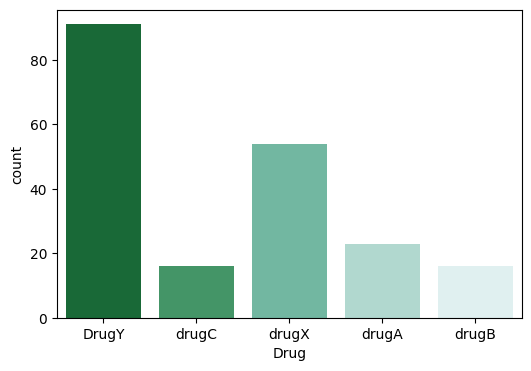

In [4]:
plt.figure(figsize=(6, 4,))
sn.countplot(x='Drug', data=drug_data,
             palette="BuGn_r")
plt.show()

# **Training the Data**

In [5]:
target_value = drug_data["Drug"]
positive_data = drug_data.drop(["Drug"], axis = 1)

In [6]:
target_value

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [7]:
positive_data

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


# **Converting Non-Numerical Values**

In [8]:
from sklearn.preprocessing import LabelEncoder

nan_conv= LabelEncoder()

positive_data["Sex"] = nan_conv.fit_transform(positive_data["Sex"])
positive_data["BP"] = nan_conv.fit_transform(positive_data["BP"])
positive_data["Cholesterol"] = nan_conv.fit_transform(positive_data["Cholesterol"])

In [9]:
positive_data

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


# **Scaling the Data**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
positive_data = scaler.fit_transform(positive_data)

# **Splitting the Data**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(positive_data, target_value, test_size=0.2, random_state=3)

# **Machine Learning Model**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
prediction = logistic_regression.predict(X_test)
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

0.975
